In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/news_scrap_politify_dataset_final - news_scrap2.csv')

In [ ]:
df.head(3)

,News,Source / Said By,stated_on,Via,Writter,Published on,Classification
0,"During the debate, Kamala Harris said Presiden...",Republican Party of Florida,"October 8, 2020",a tweet:,Amy Sherman,"October 9, 2020",FALSE
1,The Commission on Presidential Debates wrote a...,Donald Trump,"October 8, 2020",an,Samantha Putterman,"October 9, 2020",FALSE
2,Twitter removed this tweet from Donald Trump: ...,Viral image,"October 8, 2020",a Facebook post:,Ciara O'Rourke,"October 9, 2020",pants-fire


In [ ]:
df.shape

(15624, 7)

In [ ]:
df['Classification'].unique()

array(['FALSE', 'pants-fire', 'half-true', 'TRUE', 'full-flop',
       'half-flip', 'no-flip'], dtype=object)

In [ ]:
#percentage of false news:
len(df[df['Classification'] == 'FALSE']) / df.shape[0]

0.38242447516641065

In [ ]:
len(df[df['Classification'] == 'pants-fire']) / df.shape[0]

0.11283922171018945

In [ ]:
len(df[df['Classification'] == 'half-true']) / df.shape[0]

0.18522785458269328

In [ ]:
len(df[df['Classification'] == 'TRUE']) / df.shape[0]

0.3058115719406042

In [ ]:
len(df[df['Classification'] == 'full-flop']) / df.shape[0]

0.008768561187916026

In [ ]:
len(df[df['Classification'] == 'half-flip']) / df.shape[0]

0.0038402457757296467

In [ ]:
len(df[df['Classification'] == 'no-flip']) / df.shape[0]

0.0010880696364567333

In [ ]:
df.replace(to_replace ='pants-fire', value = 'FALSE', inplace = True)

In [ ]:
df.replace(to_replace =['full-flop', 'half-flip', 'no-flip'], value = 'rumors', inplace = True)

In [ ]:
df['Classification'].unique()

array(['FALSE', 'half-true', 'TRUE', 'rumors'], dtype=object)

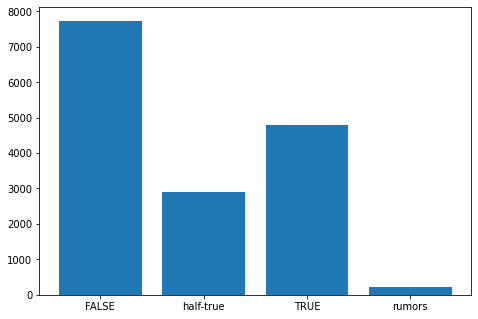

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['FALSE', 'half-true', 'TRUE', 'rumors']
y = [len(df[df['Classification'] == 'FALSE']), len(df[df['Classification'] == 'half-true']), 
              len(df[df['Classification'] == 'TRUE']), len(df[df['Classification'] == 'rumors'])]
ax.bar(x,y)
plt.show()

In [ ]:
df = df[df['Classification'] != 'rumors'] #dropping rumors still very low.

In [ ]:
df['Classification'].unique()

array(['FALSE', 'half-true', 'TRUE'], dtype=object)

In [ ]:
df.columns

Index(['News', 'Source / Said By', 'stated_on', 'Via', 'Writter',
       'Published on', 'Classification'],
      dtype='object')

In [ ]:
df.head(4)

,News,Source / Said By,stated_on,Via,Writter,Published on,Classification
0,"During the debate, Kamala Harris said Presiden...",Republican Party of Florida,"October 8, 2020",a tweet:,Amy Sherman,"October 9, 2020",FALSE
1,The Commission on Presidential Debates wrote a...,Donald Trump,"October 8, 2020",an,Samantha Putterman,"October 9, 2020",FALSE
2,Twitter removed this tweet from Donald Trump: ...,Viral image,"October 8, 2020",a Facebook post:,Ciara O'Rourke,"October 9, 2020",FALSE
3,When Sara Gideon “knew the truth about” sexual...,National Republican Senatorial Committee,"October 6, 2020",an ad:,Tom Kertscher,"October 9, 2020",FALSE


In [ ]:
df.drop(['Source / Said By', 'Via', 'Source / Said By', 'stated_on', 'Writter', 'Published on'], axis = 1, inplace = True)

In [ ]:
df.head(5)

,News,Classification
0,"During the debate, Kamala Harris said Presiden...",FALSE
1,The Commission on Presidential Debates wrote a...,FALSE
2,Twitter removed this tweet from Donald Trump: ...,FALSE
3,When Sara Gideon “knew the truth about” sexual...,FALSE
4,Says “Property crime rising in Austin. This is...,FALSE


In [ ]:
df.isnull().sum()

News              0
Classification    0
dtype: int64

In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,News,Classification
0,"During the debate, Kamala Harris said Presiden...",FALSE
1,The Commission on Presidential Debates wrote a...,FALSE
2,Twitter removed this tweet from Donald Trump: ...,FALSE
3,When Sara Gideon “knew the truth about” sexual...,FALSE
4,Says “Property crime rising in Austin. This is...,FALSE
...,...,...
15405,"Palin ""fired Wasilla's Police Chief because he...",TRUE
15406,"""While Sarah was Mayor of Wasilla she tried to...",half-true
15407,"Palin ""stopped the Bridge to Nowhere.""",FALSE
15408,John McCain's tax plan will give no reduction ...,half-true


In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
  news = re.sub('[^a-zA-z]', ' ', df['News'][i])
  news = news.lower()
  news = news.split()

  news = [ps.stem(word) for word in news if not word in stopwords.words('english')]
  news = ' '.join(news)
  corpus.append(news)

In [ ]:
X = df['News']
y = df['Classification']

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Classification'] = label_encoder.fit_transform(df['Classification'])

In [ ]:
df['Classification']

0        0
1        0
2        0
3        0
4        0
        ..
15405    1
15406    2
15407    0
15408    2
15409    2
Name: Classification, Length: 15410, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [ ]:
cv.get_feature_names()[:15]

['abbott',
 'abel',
 'abid',
 'abil',
 'abl',
 'abolish',
 'abort',
 'abort even',
 'abort even case',
 'abraham',
 'abraham lincoln',
 'absente',
 'absolut',
 'abus',
 'academi']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5162211263950168

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average = 'weighted')

0.5094494934065954

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1255,  459,  229],
       [ 428,  594,  162],
       [ 285,  301,  140]])